#  Project Title: Predicting House Prices in the U.S.

## Problem statement:
### A real estate agency wants to predict the selling prices of houses based on various features like area, number of rooms, location, etc. Accurate predictions will help in pricing strategy and investment decisions.

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [89]:
df = pd.read_csv('./house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('./house-prices-advanced-regression-techniques/test.csv')

In [90]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [91]:
print(df.shape)

(1460, 81)


In [92]:
print(df.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [93]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

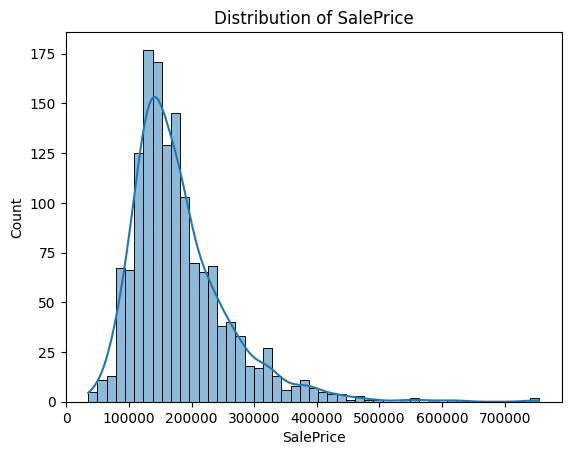

In [94]:
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.show()

In [95]:
df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)
df_test.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

In [96]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna('None')
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    df[col] = df[col].fillna(df[col].median())

for col in df_test.select_dtypes(include='object').columns:
    df_test[col] = df_test[col].fillna('None')
for col in df_test.select_dtypes(include=['int64', 'float64']).columns:
    df_test[col] = df_test[col].fillna(df_test[col].median())


In [97]:
df['TotalArea'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df['HouseAge'] = df['YrSold'] - df['YearBuilt']
df_test['TotalArea'] = df_test['TotalBsmtSF'] + df_test['1stFlrSF'] + df_test['2ndFlrSF']
df_test['HouseAge'] = df_test['YrSold'] - df_test['YearBuilt']

In [98]:
df = pd.get_dummies(df)
df_test = pd.get_dummies(df_test)

In [99]:
# Preprocess test set similarly
df_test['SalePrice'] = 0  # temporary column to align
common_cols = df.columns.intersection(df_test.columns)
df = df[common_cols]
df_test = df_test[common_cols]
df_test.drop('SalePrice', axis=1, inplace=True)

In [100]:
X = df.drop(['SalePrice', 'Id'], axis=1)
y = df['SalePrice']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [102]:
y_pred = model.predict(X_val)
print("R2 Score:", r2_score(y_val, y_pred))
print("RMSE:", mean_squared_error(y_val, y_pred, squared=False))
print("MAE:", mean_absolute_error(y_val, y_pred))

R2 Score: 0.8831930437214335
RMSE: 29932.38142756519
MAE: 17929.77489726027


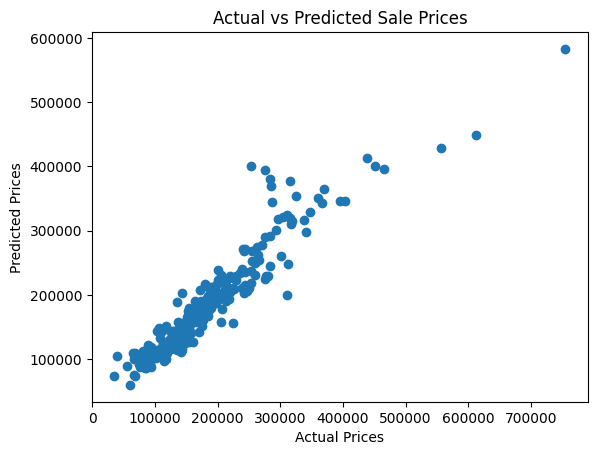

In [103]:
plt.scatter(y_val, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Sale Prices")
plt.show()

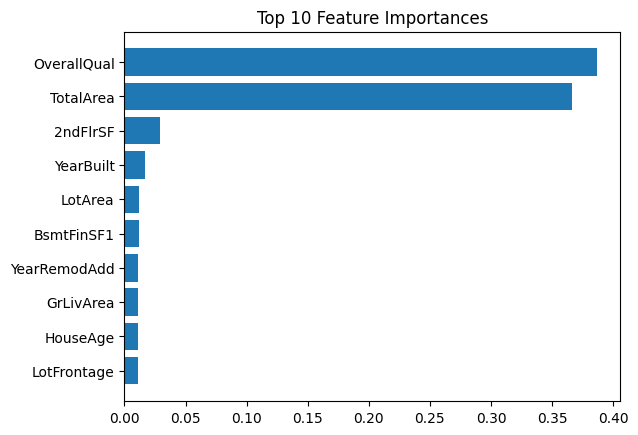

In [104]:
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[-10:]
plt.barh(features[indices], importances[indices])
plt.title("Top 10 Feature Importances")
plt.show()

In [105]:
final_model = RandomForestRegressor(n_estimators=100, random_state=42)
final_model.fit(X, y)
final_preds = final_model.predict(df_test.drop(['Id'], axis=1))

In [106]:
submission = pd.DataFrame({
    'Id': df_test['Id'],
    'SalePrice': final_preds
})
submission.to_csv('submission.csv', index=False)
print("Submission saved to submission.csv")

Submission saved to submission.csv
